In [3]:
!pip install easyocr

In [33]:
# load example images
# !pip install npx
# !npx degit JaidedAI/EasyOCR/examples -f

In [10]:
ls -l

total 5092664
-rw-r--r--  1 root root       5218 Feb 13 22:40 Untitled.ipynb
lrwxrwxrwx  1 root root          9 Feb 13 19:20 examples -> /examples
drwxr-xr-x 22 root root       4096 Feb 13 21:32 stable-diffusion-webui/
-rw-rw-r--  1 root root 5214865159 Dec  6 18:27 v2-1_768-ema-pruned.ckpt
-rw-rw-r--  1 root root       1815 Nov 26 16:03 v2-1_768-ema-pruned.yaml
drwxr-xr-x 29 root root       4096 Feb 13 16:51 venv/
lrwxrwxrwx  1 root root         19 Feb 13 19:20 welcome.ipynb -> /root/welcome.ipynb


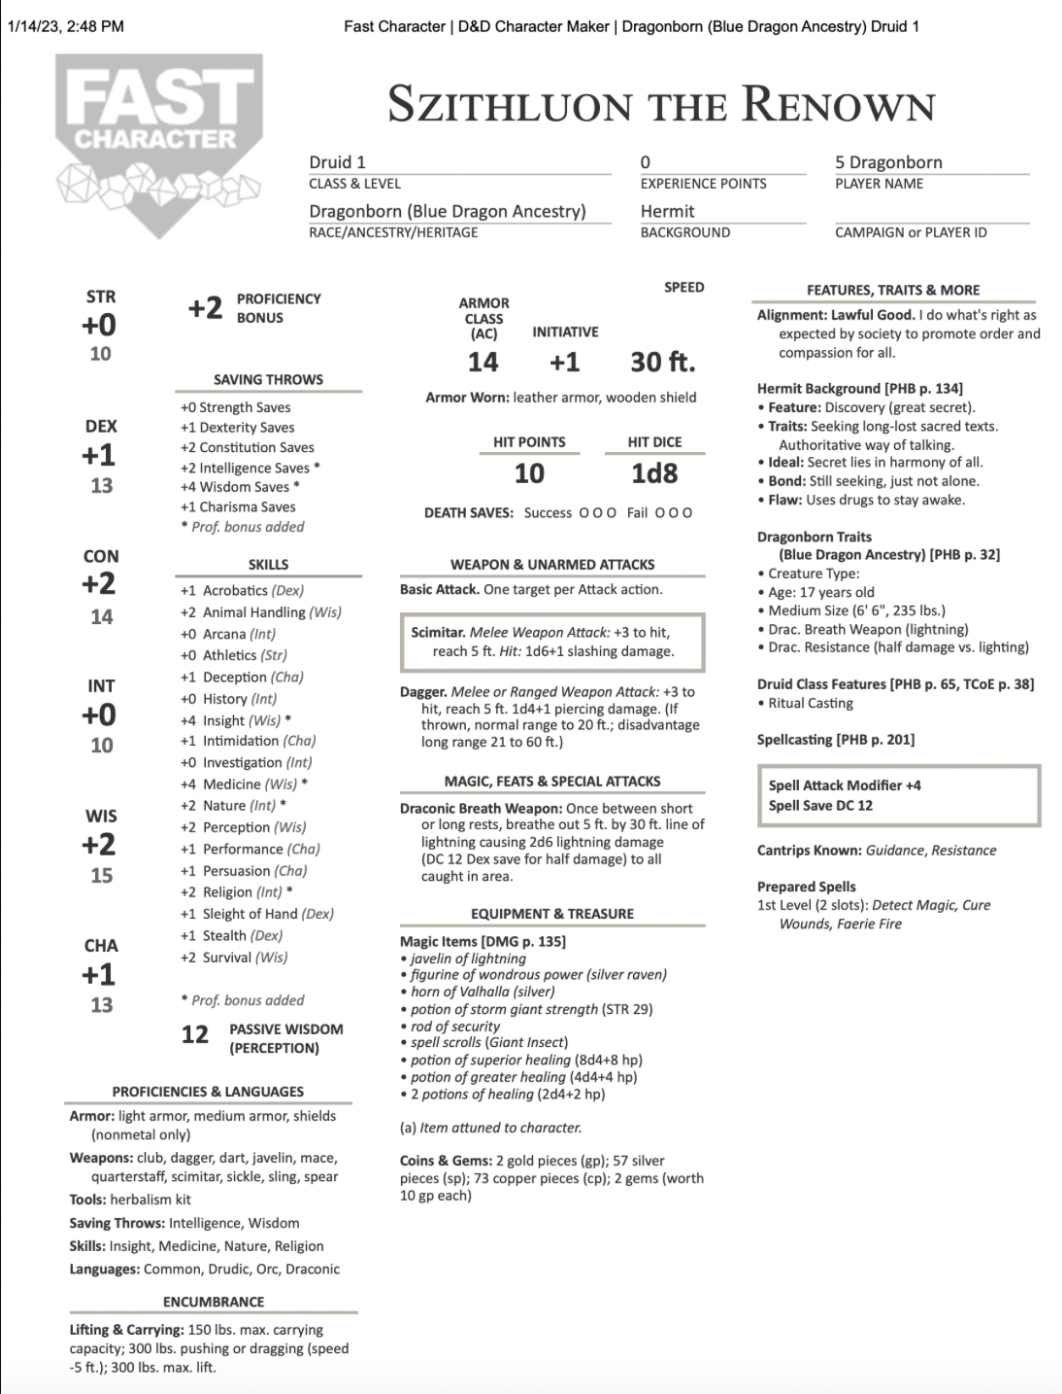

In [12]:
# show an image
import PIL
from PIL import ImageDraw
import numpy as np
import math
import re
import random
im = PIL.Image.open("d1.png")
im

In [13]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [19]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext('d1.png')
type(bounds)

list

In [25]:
bounds[0]

([[5, 17], [127, 17], [127, 35], [5, 35]],
 '1/14/23,2.48 PM',
 0.6731566572796561)

In [26]:
bounds[1]

([[343, 17], [449, 17], [449, 35], [343, 35]],
 'Fast Character',
 0.7373436528379814)

In [23]:
type(bounds[2])

tuple

In [28]:
#convert list of tuple into string
ocrtext = str(bounds)

In [31]:
#convert list of tuple into string
bounds

[([[5, 17], [127, 17], [127, 35], [5, 35]],
  '1/14/23,2.48 PM',
  0.6731566572796561),
 ([[343, 17], [449, 17], [449, 35], [343, 35]],
  'Fast Character',
  0.7373436528379814),
 ([[457, 17], [613, 17], [613, 35], [457, 35]],
  'D&D Character Maker',
  0.7731123767449769),
 ([[621, 18], [911, 18], [911, 38], [621, 38]],
  'Dragonborn (Blue Dragon Ancestry) Druid',
  0.6582611211967703),
 ([[58, 58], [264, 58], [264, 132], [58, 132]], 'FASTI', 0.9297931430099906),
 ([[382, 78], [942, 78], [942, 128], [382, 128]],
  'SZITHLUON THE RENOWN',
  0.7980269205853994),
 ([[72, 124], [242, 124], [242, 154], [72, 154]],
  'GHAARAGTaR',
  0.15714683189956877),
 ([[307, 151], [367, 151], [367, 171], [307, 171]],
  'Druid 1',
  0.9996859012508976),
 ([[846, 150], [946, 150], [946, 176], [846, 176]],
  'Dragonborn',
  0.7809385350905813),
 ([[309, 177], [403, 177], [403, 193], [309, 193]],
  'CLASS & LEVEL',
  0.7151750652408374),
 ([[639, 173], [769, 173], [769, 193], [639, 193]],
  'EXPERIENCE POI

In [32]:
# look through the ocrtext and return the class and level
def class_level(ocrtext):
    classes = ["Ranger", "Fighter", "Rogue", "Wizard", "Cleric", "Barbarian", "Monk", "Paladin", "Druid", "Sorcerer", "Bard", "Warlock", "Artificer"]
    pattern = '|'.join(classes)
    match = re.search(pattern, ocrtext, re.IGNORECASE)
    if match:
        return match.group()
    else:
        return "Not a Class"

# look through the text and return what colour the dragonborn is
def dragonborn_colour(ocrtext):
    classes = ["(Black Dragon Ancestry)", "(Blue Dragon Ancestry)", "(Brass Dragon Ancestry)", "(Bronze Dragon Ancestry)", "(Copper Dragon Ancestry)", "(Gold Dragon Ancestry)", "(Green Dragon Ancestry)", "(Red Dragon Ancestry)", "(Silver Dragon Ancestry)", "(White Dragon Ancestry)"]
    pattern = '|'.join(classes)
    match = re.search(pattern, ocrtext, re.IGNORECASE)
    if match:
        return match.group()
    else:
        return "Not a Dragonborn"

print(dragonborn_colour(ocrtext))
print(class_level(ocrtext))

Blue Dragon Ancestry
Druid
